In [2]:
import tensorflow as tf
import os
import zipfile

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


--2020-03-23 07:34:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-03-23 07:34:41 (169 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()



In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('acc') > 0.999):
      print('\n99.9% Accuracy is obtained, Stopping training...')
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
train_happy_dir=os.path.join('/tmp/h-or-s/happy')
train_sad_dir=os.path.join('/tmp/h-or-s/sad')

In [7]:
happy=os.listdir(train_happy_dir)
sad=os.listdir(train_sad_dir)
print(happy[:10])
print(sad[:10])

['happy1-04.png', 'happy1-14.png', 'happy1-05.png', 'happy1-12.png', 'happy1-19.png', 'happy2-15.png', 'happy1-08.png', 'happy2-03.png', 'happy2-08.png', 'happy2-18.png']
['sad2-15.png', 'sad1-04.png', 'sad1-01.png', 'sad2-14.png', 'sad1-07.png', 'sad2-11.png', 'sad1-10.png', 'sad1-19.png', 'sad1-13.png', 'sad1-02.png']


In [8]:
print(len(happy))
print(len(sad))

40
40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x150 at 0x7FC263D3E2E8>


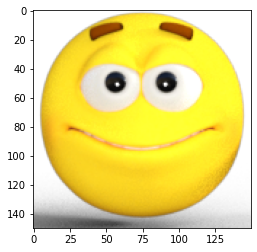

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x150 at 0x7FC263DD0A20>


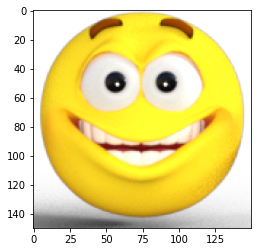

In [27]:
from PIL import Image as PImage

def loadImages(train_happy_dir):
    # return array of images

    imagesList = happy
    loadedImages = []
    for image in imagesList:
        img = PImage.open(train_happy_dir +'/'+ image)
        loadedImages.append(img)

    return loadedImages



# your images in an array
imgs = loadImages(train_happy_dir)

for img in imgs[:2]:
  print(img)
    # you can show every image
  plt.imshow(img)
  plt.show()    

In [28]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=1,  
    epochs=30,
    verbose=1, 
    callbacks=[callbacks])

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 0.6930 - acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 203ms/step - loss: 46.8320 - acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 255ms/step - loss: 12.1599 - acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 281ms/step - loss: 0.7138 - acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 285ms/step - loss: 0.9300 - acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 213ms/step - loss: 1.5283 - acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 282ms/step - loss: 0.5327 - acc: 0.9125
Epoch 8/30
1/1 [==============================] - 0s 297ms/step - loss: 0.4589 - acc: 0.7500
Epoch 9/30
1/1 [==============================] - 0s 300ms/step - loss: 0.5147 - acc: 0.7125
Epoch 10/30
1/1 [==============================] - 0s 217ms/step - loss: 0.5648 - acc: 0.5625
Epoch 11/30
1/1 [==============================] - 0s 269ms/step - los

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0:
    print(fn + "\n sad face")
  else:
    print(fn + "\n happy")

Saving download.jpeg to download (2).jpeg
[0.]
download.jpeg
 happy
